<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS17_422_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [28]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=c5383579245538c9bb72eab87f03a90d90f83b7bc32fa67b13252aaad993e7aa
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [29]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import wget

In [32]:
def load_quickdraw10(path):
  wget.download(path)
  data = np.load('quickdraw10.npz')
  X = data['arr_0']
  y = data['arr_1']

  print(X.shape)
  print(y.shape)

  X, y = shuffle(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  return X_train, y_train, X_test, y_test

In [33]:
path = 'https://github.com/skhabiri/DS-Unit-4-Sprint-2-Neural-Networks/raw/main/module1-Architect/quickdraw10.npz'
X_train, y_train, X_test, y_test = load_quickdraw10(path)

(100000, 784)
(100000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam


In [43]:
def create_model(optim, lr=0.01):
  """
  784+1 * 32+1 * 32+1 * 10
  """
  opt = optim(learning_rate=lr)
  model = Sequential(
      [
      #  784 inputs + 1 bias connect to 32 1st layer Hiddent neurons
       Dense(32, activation='relu', input_dim=784),
      #  32 1st-H-Neurons + 1 bias connected to 32 2'nd layer H-Neurons
       Dense(32, activation='relu'),
      #  32 2nd-H-neurons connect to 10 Output neurons
       Dense(10, activation='softmax')       
      ]
    )
  # sparse_categorical_crossentropy is good for multilable classification
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


In [49]:
model_sgd = create_model(optim=SGD, lr=0.01)
model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_adam = create_model(optim=Adam, lr=0.01)
model_adam.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [50]:
bt_8 = model_sgd.fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/25
10000/10000 [==============================] - 22s 2ms/step - loss: 81163.9453 - accuracy: 0.1003 - val_loss: 4.8003 - val_accuracy: 0.0991
Epoch 2/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 4.8003 - val_accuracy: 0.0962
Epoch 3/25
10000/10000 [==============================] - 21s 2ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 4.8002 - val_accuracy: 0.0962
Epoch 4/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 4.8003 - val_accuracy: 0.0996
Epoch 5/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3029 - accuracy: 0.1011 - val_loss: 4.8004 - val_accuracy: 0.0985
Epoch 6/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 4.7999 - val_accuracy: 0.1011
Epoch 7/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3029 - accuracy: 0.1007 - val_los

In [51]:
bt_32 = model_sgd.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 4.8001 - val_accuracy: 0.0979
Epoch 2/25
2500/2500 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 4.8001 - val_accuracy: 0.0979
Epoch 3/25
2500/2500 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1011 - val_loss: 4.8000 - val_accuracy: 0.0996
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 4.8001 - val_accuracy: 0.0975
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 4.8000 - val_accuracy: 0.0962
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 4.8001 - val_accuracy:

In [52]:
bt_128 = model_sgd.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 4.8001 - val_accuracy: 0.0975
Epoch 2/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 3/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 4/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 5/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 6/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 7/25
625/625 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 

In [53]:
bt_512 = model_sgd.fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 2/25
157/157 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 3/25
157/157 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 6/25
157/157 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 7/25
157/157 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 

In [54]:
bt_1024 = model_sgd.fit(X_train, y_train, epochs=25, batch_size=1024, validation_data=(X_test, y_test))

Epoch 1/25
79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 2/25
79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 3/25
79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 4/25
79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 5/25
79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 6/25
79/79 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 7/25
79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 4.8001 - val_accuracy: 0.0962
Epoch 8/25
79/79 [==

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
def nn_plot(param, fit_list, val_list):
  """
  param: String name for the hyper parameter
  fit_list: list of fitted model names
  val_list: list of strings representing values of the parameter
  """
  param_list=[]
  for exp, result in zip(fit_list, val_list):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df[param] = result

    param_list.append(df)

  df = pd.concat(param_list)
  df[param] = df[param].astype('str')

  fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
  sns.lineplot(x='epoch', y='val_accuracy', hue=param, data=df, ax=axs[0])
  sns.lineplot(x='epoch', y='val_loss', hue=param, data=df, ax=axs[1])
  axs[0].set_title('Accuracy -- '+param)
  axs[1].set_title('Loss -- '+param)


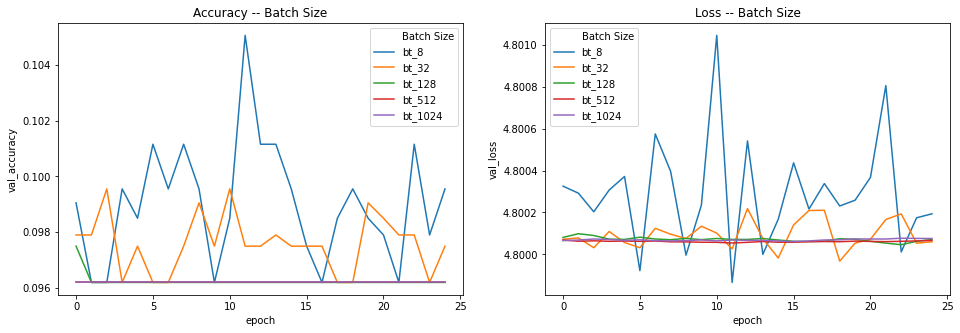

In [118]:
nn_plot("Batch Size", [bt_8, bt_32, bt_128, bt_512, bt_1024], ['bt_8', 'bt_32', 'bt_128', 'bt_512', 'bt_1024'])

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [60]:
lr_100u = create_model(optim=SGD, lr=0.0001).fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 3ms/step - loss: 19.8224 - accuracy: 0.2414 - val_loss: 5.3593 - val_accuracy: 0.2247
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 3.8334 - accuracy: 0.2210 - val_loss: 3.1040 - val_accuracy: 0.2219
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 2.8203 - accuracy: 0.2232 - val_loss: 2.6386 - val_accuracy: 0.2286
Epoch 4/25
157/157 [==============================] - 1s 4ms/step - loss: 2.5348 - accuracy: 0.2274 - val_loss: 2.4546 - val_accuracy: 0.2304
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.4013 - accuracy: 0.2309 - val_loss: 2.3543 - val_accuracy: 0.2353
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3208 - accuracy: 0.2394 - val_loss: 2.2894 - val_accuracy: 0.2457
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 2.2641 - accuracy: 0.2473 - val_loss: 2.2433 - val_accuracy: 0.2525
Epoch

In [61]:
lr_1m = create_model(optim=SGD, lr=0.001).fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 4ms/step - loss: 4.6182 - accuracy: 0.1708 - val_loss: 2.2570 - val_accuracy: 0.1974
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 2.1979 - accuracy: 0.2080 - val_loss: 2.1581 - val_accuracy: 0.2194
Epoch 3/25
157/157 [==============================] - 1s 3ms/step - loss: 2.1145 - accuracy: 0.2326 - val_loss: 2.0947 - val_accuracy: 0.2424
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 2.0529 - accuracy: 0.2589 - val_loss: 2.0420 - val_accuracy: 0.2655
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.0041 - accuracy: 0.2785 - val_loss: 1.9992 - val_accuracy: 0.2815
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 1.9654 - accuracy: 0.2933 - val_loss: 1.9669 - val_accuracy: 0.2957
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 1.9346 - accuracy: 0.3055 - val_loss: 1.9403 - val_accuracy: 0.3043
Epoch 

In [62]:
lr_10m = create_model(optim=SGD, lr=0.01).fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 3ms/step - loss: 68.5301 - accuracy: 0.1004 - val_loss: 2.3115 - val_accuracy: 0.0962
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 2.4127 - accuracy: 0.1006 - val_loss: 2.3111 - val_accuracy: 0.0962
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3060 - accuracy: 0.1010 - val_loss: 2.3111 - val_accuracy: 0.0962
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3045 - accuracy: 0.1010 - val_loss: 2.3110 - val_accuracy: 0.0962
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3040 - accuracy: 0.1010 - val_loss: 2.3110 - val_accuracy: 0.0962
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3030 - accuracy: 0.1010 - val_loss: 2.3110 - val_accuracy: 0.0962
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3029 - accuracy: 0.1010 - val_loss: 2.3110 - val_accuracy: 0.0962
Epoch

In [63]:
lr_100m = create_model(optim=SGD, lr=0.1).fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 3ms/step - loss: 54497.2539 - accuracy: 0.0991 - val_loss: 2.3303 - val_accuracy: 0.0962
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3041 - accuracy: 0.1004 - val_loss: 2.3303 - val_accuracy: 0.0962
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.0996 - val_loss: 2.3304 - val_accuracy: 0.0962
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3304 - val_accuracy: 0.0979
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3304 - val_accuracy: 0.0992
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3304 - val_accuracy: 0.0975
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3303 - val_accuracy: 0.0996
Ep

In [64]:
lr_1 = create_model(optim=SGD, lr=1).fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 4ms/step - loss: 7308747735040.0000 - accuracy: 0.0991 - val_loss: 2.3032 - val_accuracy: 0.0985
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.1001 - val_loss: 2.3031 - val_accuracy: 0.1011
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0962
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3030 - accuracy: 0.0983 - val_loss: 2.3037 - val_accuracy: 0.0979
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.0991
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.0997 - val_loss: 2.3031 - val_accuracy: 0.0991
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3037 - val_accuracy: 0

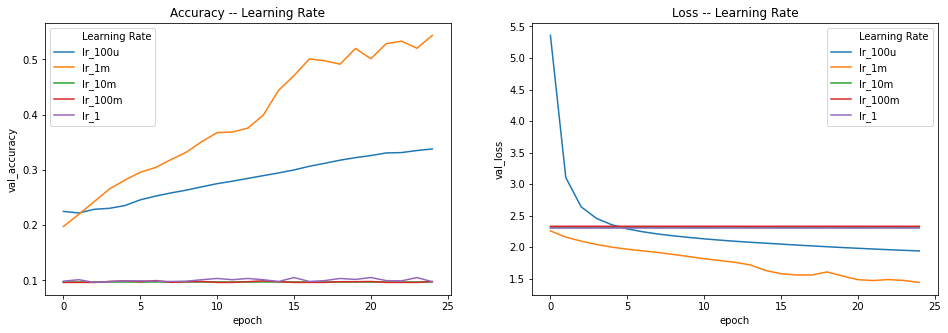

In [119]:
nn_plot("Learning Rate", [lr_100u, lr_1m, lr_10m, lr_100m, lr_1], ['lr_100u', 'lr_1m', 'lr_10m', 'lr_100m', 'lr_1'])

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [121]:
from tensorflow.keras.optimizers import *

In [123]:
d={}
for i, m in enumerate([Adadelta, Adagrad, Adam, Ftrl, SGD]):
  d[f"model{i}"] = create_model(optim=m, lr=.001).fit(X_train, y_train, epochs=25, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 4ms/step - loss: 127.9763 - accuracy: 0.0812 - val_loss: 122.2707 - val_accuracy: 0.0843
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 117.6754 - accuracy: 0.0834 - val_loss: 112.6564 - val_accuracy: 0.0862
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 108.4356 - accuracy: 0.0869 - val_loss: 104.0927 - val_accuracy: 0.0886
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 100.2184 - accuracy: 0.0903 - val_loss: 96.5147 - val_accuracy: 0.0928
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 92.9312 - accuracy: 0.0934 - val_loss: 89.7993 - val_accuracy: 0.0956
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 86.4591 - accuracy: 0.0967 - val_loss: 83.7889 - val_accuracy: 0.0992
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 80.6277 - accuracy: 0.1007 - val_loss: 78.3231 - val_ac

In [131]:
d['model0']

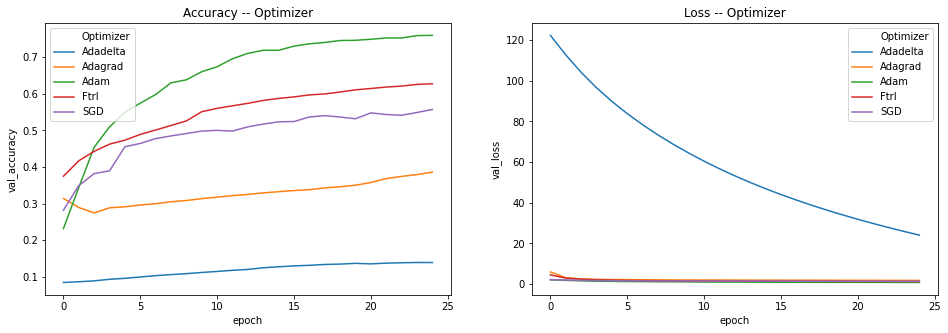

In [132]:
nn_plot(param="Optimizer", fit_list=[d['model0'], d['model1'], d['model2'],d['model3'],d['model4']], val_list=['Adadelta', 'Adagrad', 'Adam', 'Ftrl', 'SGD'])

> *Seems like the entire X is divided into batches of size n and the NN is trained on each batch of n samples and W, b get's updated at the end of each batch of n. Once all batches in a training dataset are trained the epoch counter goes up and we create another set of batches randomly and exclusively (like Kfold) and retrain based on each of the new batches again. For stochastic GD, batch size is 1 and the accuracy of each update is low but number of updates are maximum, as the # of back propagation is maximum = "one back-propagation for each batch of each epoch.". That resuls in long computing time for each epoch. The training trend is very noise since the updates are done based on individual samples. 
In batch size GD, the number of batches is one and the size of the batch is equal to training set. Hence the epoch looks at the same entire training dataset repeatedly and make an update on every epoch run. Less noisy and minimum number of back propagation = one back-propagation per epoch. Hence runtime is faster per epoch. However need a large memory to process the entire dataset in one shot.*

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


